In [23]:
import this

import pandas as pd
from thoughtfulness_model import ThoughtfulnessModel


The review belongs to: Tier 3: Thoughtful (detailed, unique, and relevant)


In [24]:
# Load dataset and explore
print("Loading dataset...")
df = pd.read_csv('dataset.csv')

print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df['review_text'].head())
print("\n")

Loading dataset...
   app_id        app_name                                        review_text  \
0      10  Counter-Strike                                    Ruined my life.   
1      10  Counter-Strike  This will be more of a ''my experience with th...   
2      10  Counter-Strike                      This game saved my virginity.   
3      10  Counter-Strike  • Do you like original games? • Do you like ga...   
4      10  Counter-Strike           Easy to learn, hard to master.             

   review_score  review_votes  
0             1             0  
1             1             1  
2             1             0  
3             1             0  
4             1             1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int6

In [25]:
# Initialize the ThoughtfulnessModel
manual_keywords = [
    "gameplay", "mechanics", "levels", "difficulty", "balance",
    "graphics", "resolution", "textures", "lighting", "animation",
    "soundtrack", "audio", "music", "effects", "story", "plot",
    "characters", "narrative", "controls", "input", "interface",
    "ak", "m4a1", "sniper", "headshot", "weapon", "recoil", "quests",
    "loot", "skills", "character", "dialogue", "leveling", "ranked",
    "matchmaking", "strategy", "heroes", "abilities"
]

model = ThoughtfulnessModel(manual_keywords)

In [26]:
# Clean the reviews
print("Cleaning reviews...")
df = df.dropna(subset=['review_text'])
df['cleaned_review'] = df['review_text'].apply(model.clean_text)

print(df.info())
print("\n")
print(df['cleaned_review'].head())
print("\n")

Cleaning reviews...
<class 'pandas.core.frame.DataFrame'>
Index: 6409801 entries, 0 to 6417105
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   app_id          int64 
 1   app_name        object
 2   review_text     object
 3   review_score    int64 
 4   review_votes    int64 
 5   cleaned_review  object
dtypes: int64(3), object(3)
memory usage: 342.3+ MB
None


0                                       ruined my life
1    this will be more of a my experience with this...
2                         this game saved my virginity
3    do you like original games  do you like games ...
4                         easy to learn hard to master
Name: cleaned_review, dtype: object




In [30]:
from tqdm import tqdm

print("Assigning tiers to reviews...")

# 配置 tqdm 的进度条
tqdm.pandas(desc="Processing reviews")

# 使用 tqdm 的 progress_apply 替代 apply 方法
df['tier'] = df['cleaned_review'].progress_apply(lambda text: model.hybrid_tier_prediction(text))


Assigning tiers to reviews...


Processing reviews: 100%|██████████| 6409801/6409801 [37:47<00:00, 2827.43it/s]  


In [31]:
# Analyze the tier distribution
print("Analyzing tier distribution...")
tier_counts = df['tier'].value_counts()
print(tier_counts)

Analyzing tier distribution...
tier
2    4761893
1    1505670
0     134292
3       7946
Name: count, dtype: int64


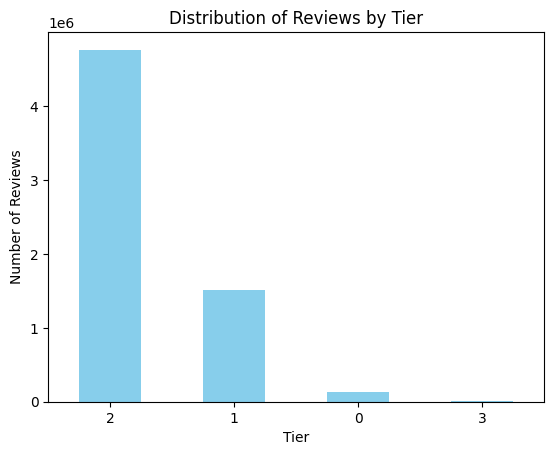

In [32]:
# Visualize the tier distribution
import matplotlib.pyplot as plt

tier_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Reviews by Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [33]:
# Save the results
output_path = "tiered_reviews.csv"
df.to_csv(output_path, index=False)
print(f"Tiered reviews saved to {output_path}")

Tiered reviews saved to tiered_reviews.csv
